In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [39]:
PATH_2210 = "Datos\E01_T_DEU_CONS_2210_REV.csv"
PATH_2211 = "Datos\E01_T_DEU_CONS_2211_REV.csv"
PATH_2212 = "Datos\E01_T_DEU_CONS_2212_REV.csv"
PATH_2301 = "Datos\E01_T_DEU_CONS_2301_REV.csv"
PATH_2302 = "Datos\E01_T_DEU_CONS_2302_REV.csv"
PATH_2303 = "Datos\E01_T_DEU_CONS_2303_REV.csv"
PATH_DICC = "Datos\Diccionario T_DEU_CONS.xlsx"
BANCO_CODS = [39,27]
MONEDA_CODS = [1,2,3] # Peso chileno, UF y dolar

In [69]:
df2210 = pd.read_csv(PATH_2210, delimiter=";")
#df2211 = pd.read_csv(PATH_2211,delimiter=";")

In [79]:
df2210.columns

Index(['BANCO', 'PERIODO', 'RUT', 'NUMOPE', 'OPENOIBS', 'CODFAM', 'CODPRO',
       'CODTLP', 'CODCLAS', 'ESTADO', 'MTOINT', 'MTOORIG', 'MTOORIGP',
       'MONEDA', 'MTOVENC', 'DCOMO2', 'DCOMO3', 'MTOCAST', 'DIASMORA',
       'MTOREV', 'TIPDEUDA', 'TASAINT', 'CUOTOT', 'CUOIMP', 'CUOPEN', 'FECOPE',
       'FECVEN', 'CODBLO', 'MARDET', 'SALDOPUNTA', 'SEGMENTO', 'MARCAIG',
       'PERIODICIDAD', 'MCUOTA', 'IMPFM', 'DESTIN', 'INDACT', 'CUPOD', 'MUTID',
       'IMPFMD', 'ULTXCO', 'FECACT', 'LCIDFOGA', 'FECBAJ', 'SPROM', 'SMAX',
       'SMIN', 'SALMD', 'MARDETF', 'FPVENC', 'DISPONIBLE', 'CONTINGENTE',
       'GASTO', 'SegmentoCliente'],
      dtype='object')

In [75]:
def get_nan_cols(df, nan_percent=0.8):
    'Retorna columnas con porcentaje NaN mayor a nan_percent'
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if sum(df[c].isnull()) >= threshold]  

In [81]:
df2210 = df2210[['CODFAM', 'CODPRO',
       'CODTLP', 'CODCLAS', 'ESTADO', 'MTOINT', 'MTOORIG', 'MTOORIGP',
       'MONEDA', 'MTOVENC', 'DCOMO2', 'DCOMO3', 'MTOCAST', 'DIASMORA',
       'MTOREV',  'TASAINT', 'FECOPE',
       'FECVEN', 'SALDOPUNTA','MCUOTA', 'SPROM']].dropna()
df2210.shape

(866145, 21)

In [85]:
df2210.dtypes

CODFAM         object
CODPRO         object
CODTLP         object
CODCLAS        object
ESTADO          int64
MTOINT        float64
MTOORIG       float64
MTOORIGP      float64
MONEDA        float64
MTOVENC       float64
DCOMO2        float64
DCOMO3        float64
MTOCAST       float64
DIASMORA        int64
MTOREV        float64
TASAINT       float64
FECOPE          int64
FECVEN          int64
SALDOPUNTA    float64
MCUOTA        float64
SPROM         float64
dtype: object

In [82]:
df2210.head()

,CODFAM,CODPRO,CODTLP,CODCLAS,ESTADO,MTOINT,MTOORIG,MTOORIGP,MONEDA,MTOVENC,...,DCOMO3,MTOCAST,DIASMORA,MTOREV,TASAINT,FECOPE,FECVEN,SALDOPUNTA,MCUOTA,SPROM
17,CCTE,CA,C,LI,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,20191120,19000101,-1391300.0,0.0,1065482.0
18,CCTE,CA,C,LI,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,20220225,20221102,44.0,0.0,6985.0
19,CCTE,CA,C,LI,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,20140124,19000101,-976531.0,0.0,156690.0
20,CCTE,CA,C,LI,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,20070926,19000101,0.0,0.0,191756.0
21,CCTE,CA,C,LI,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,20190429,19000101,0.0,0.0,10105089.0


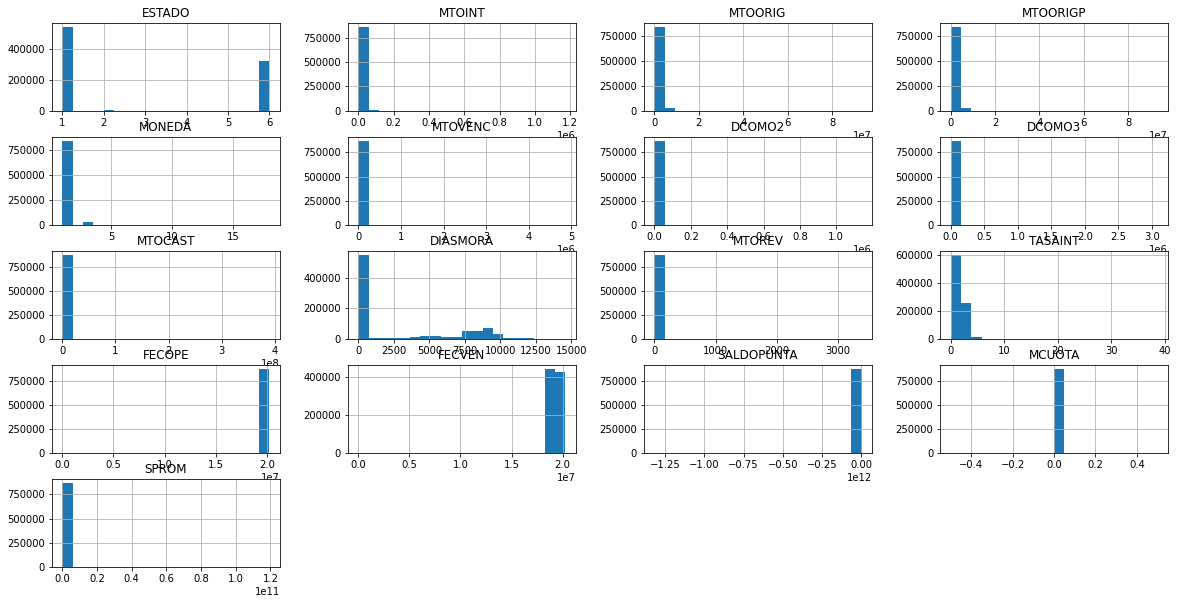

In [91]:
# Por ahora solo con numericos
df_num = df2210[['ESTADO', 'MTOINT', 'MTOORIG', 'MTOORIGP',
       'MONEDA', 'MTOVENC', 'DCOMO2', 'DCOMO3', 'MTOCAST', 'DIASMORA',
       'MTOREV',  'TASAINT', 'FECOPE',
       'FECVEN', 'SALDOPUNTA','MCUOTA', 'SPROM']]

df_num.hist(bins = 20, figsize =(20, 10))
plt.show()

In [92]:
iForest = IsolationForest(n_estimators=20, verbose=0, contamination=0.1)
iForest.fit(df_num)

IsolationForest(n_estimators=20)

In [93]:
df_num['is_anomaly_prediction'] = iForest.predict(df_num)

<ipython-input-93-b02e2d582972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['is_anomaly_prediction'] = iForest.predict(df_num)


<AxesSubplot:xlabel='MTOINT', ylabel='MTOORIG'>

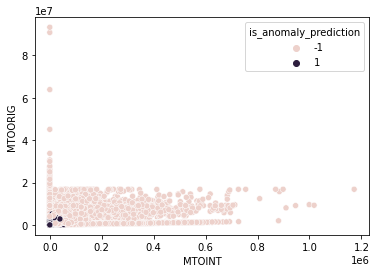

In [96]:
sns.scatterplot(
    data = df_num, 
    x = 'MTOINT', 
    y = 'MTOORIG', 
    #hue = 'is_really_anomaly', 
    hue='is_anomaly_prediction'
)

In [100]:
print(np.max(pred_scores))
print(np.argmax(pred_scores))

0.7998960606250983
18912


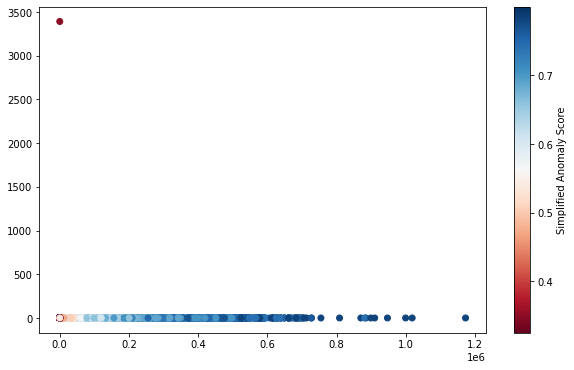

In [98]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.scatter(df_num.MTOINT, df_num.MTOREV, c=pred_scores, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score')
plt.show()

(array([425952.,  35921., 344521.,  19959.,   9351.,  14085.,   5542.,
          4703.,   3473.,   2638.]),
 array([0.32520086, 0.37267038, 0.4201399 , 0.46760942, 0.51507894,
        0.56254846, 0.61001798, 0.6574875 , 0.70495702, 0.75242654,
        0.79989606]),
 <BarContainer object of 10 artists>)

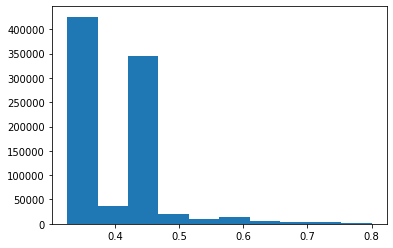

In [99]:
plt.hist(pred_scores)

# Con PCA (para visualizacion)

Aplicaremos PCA para reducir la dimensionalidad (esto es solo con fines de visualizacion)

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Tomamos muestra de variables a analizar, y vemos si necesitamos 2 o 3 PCs para reducir dim

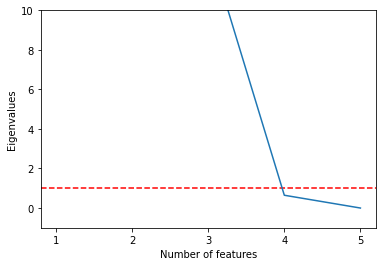

In [216]:
dfelbow = df2210[['MTOINT', 'DIASMORA', 'MTOREV', 'TASAINT', 'MCUOTA']]

covar_matrix = PCA(n_components=len(dfelbow.columns))
covar_matrix.fit(dfelbow)

Xelbow = [i for i in range(1, len(dfelbow.columns) + 1 )]

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.xticks(Xelbow)
plt.ylim(-1, 10)
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(Xelbow, covar_matrix.explained_variance_)
plt.show()

In [211]:
def iso_forest2(df, n_components, n_estimators, contamination):
    'Primero hacemos iForest, luego PCA'

    if 'is_anomaly_prediction' in df.columns:
        df.drop(columns=['is_anomaly_prediction'], axis=1, inplace=True)
    if 'iForest_scores' in df.columns:
        df.drop(columns=['iForest_scores', 'iForest_outliers'], axis=1, inplace=True)

    # iForest
    # Hay que hacer cross validation de CONTAMINATION
    iForest = IsolationForest(n_estimators=n_estimators, verbose=0, contamination=contamination)
    iForest.fit(df.values)
    predictions = iForest.predict(df.values)

    # Extract scores
    df["iForest_scores"] = iForest.decision_function(df.values)
    # Extract predictions
    df["iForest_outliers"] = predictions
    # Describe the dataframe
    print('Summary')
    print(df[['iForest_scores', 'iForest_outliers']].describe())

    # Standardize features
    df_scaled = StandardScaler().fit_transform(df)
    # Define dimensions = 2
    pca = PCA(n_components=n_components)
    # Conduct the PCA
    principal_comp = pca.fit_transform(df_scaled)
    # Convert to dataframe

    pca_df = pd.DataFrame(data = principal_comp, columns = [f'PC{i+1}' for i in range(n_components)])

    print('Prediciones:', df.iForest_outliers.value_counts())

    if n_components == 2:
        fig, ax = plt.subplots(1,1, figsize=(10,8))
        plt.scatter(pca_df.PC1, pca_df.PC2, c=df.iForest_scores, cmap='RdBu')
        plt.title(f'iForest scores, $\lambda = {contamination}$')
        plt.colorbar(label='iForest outliers')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(projection='3d')
        ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c=df.iForest_scores, cmap='RdBu')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
    else:
        print('No es posible visualizar resultados para mas componentes')

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.161001          0.900689
std          0.073776          0.434465
min         -0.200570         -1.000000
25%          0.138662          1.000000
50%          0.177173          1.000000
75%          0.218238          1.000000
max          0.234950          1.000000
Prediciones: iForest_outliers
 1    823136
-1     43009
Name: count, dtype: int64


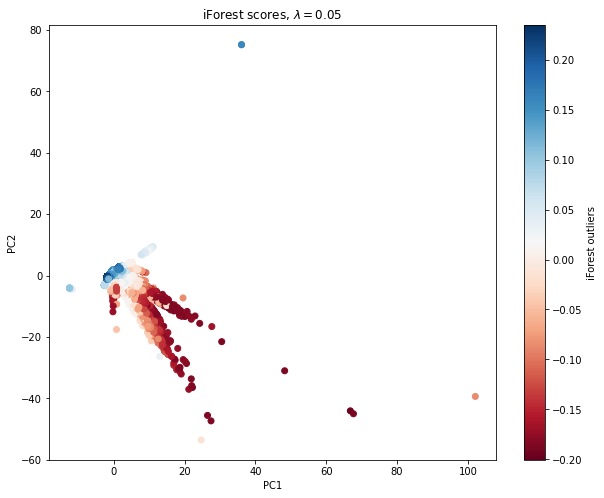

In [212]:
import warnings

warnings.filterwarnings('ignore')
iso_forest2(df_num, 2, 20, 0.05)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.207216          0.960009
std          0.079102          0.279969
min         -0.166428         -1.000000
25%          0.171277          1.000000
50%          0.221223          1.000000
75%          0.275244          1.000000
max          0.285993          1.000000
Prediciones: iForest_outliers
 1    848826
-1     17319
Name: count, dtype: int64


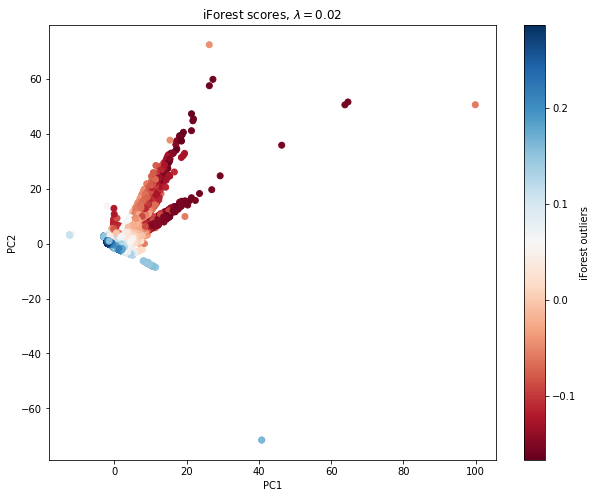

In [215]:
iso_forest2(df_num, 2, 20, 0.02)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.040240          0.500001
std          0.075355          0.866026
min         -0.306501         -1.000000
25%          0.000000          1.000000
50%          0.051739          1.000000
75%          0.107704          1.000000
max          0.121249          1.000000
Prediciones: iForest_outliers
 1    649609
-1    216536
Name: count, dtype: int64


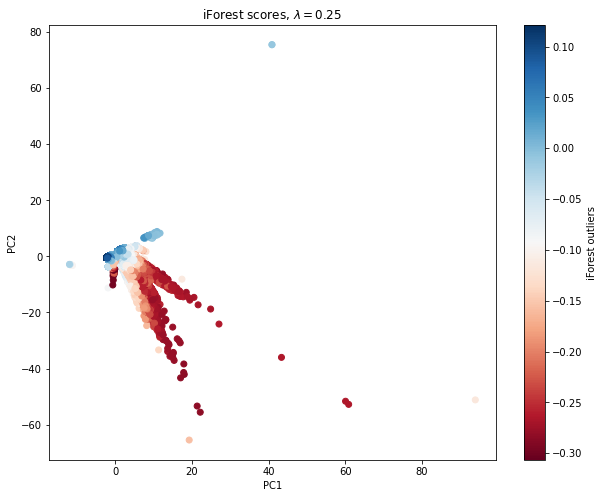

In [214]:
iso_forest2(df_num, 2, 20, 0.25)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.157143          0.900213
std          0.074760          0.435450
min         -0.224926         -1.000000
25%          0.124570          1.000000
50%          0.168444          1.000000
75%          0.222776          1.000000
max          0.231956          1.000000
Prediciones: iForest_outliers
 1    822930
-1     43215
Name: count, dtype: int64


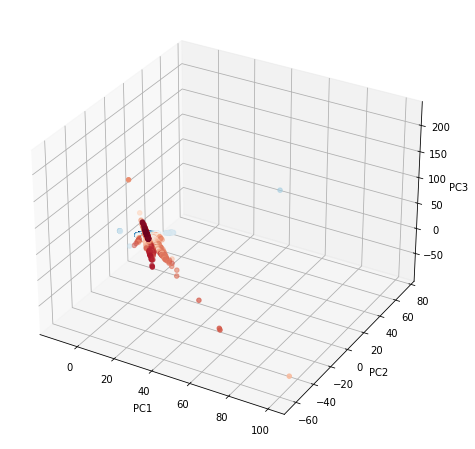

In [213]:
iso_forest2(df_num, 3, 20, 0.05)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.167389          0.900190
std          0.089182          0.435498
min         -0.199734         -1.000000
25%          0.104641          1.000000
50%          0.233240          1.000000
75%          0.233240          1.000000
max          0.233240          1.000000
Prediciones: iForest_outliers
 1    822920
-1     43225
Name: count, dtype: int64


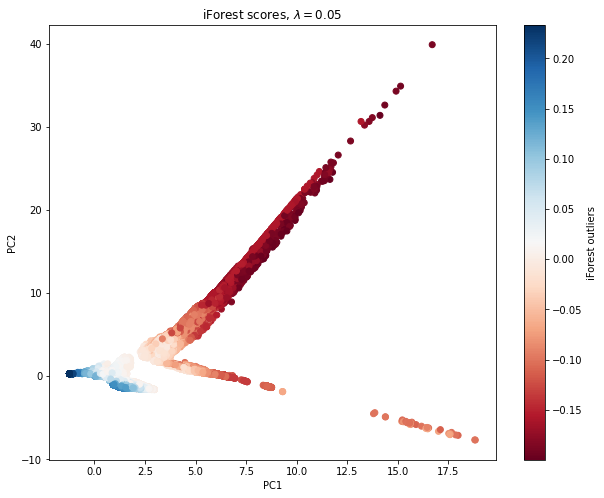

In [217]:
iso_forest2(dfelbow, 2, 20, 0.05)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.221182          0.940405
std          0.088735          0.340057
min         -0.154614         -1.000000
25%          0.175883          1.000000
50%          0.283146          1.000000
75%          0.283146          1.000000
max          0.283146          1.000000
Prediciones: iForest_outliers
 1    840336
-1     25809
Name: count, dtype: int64


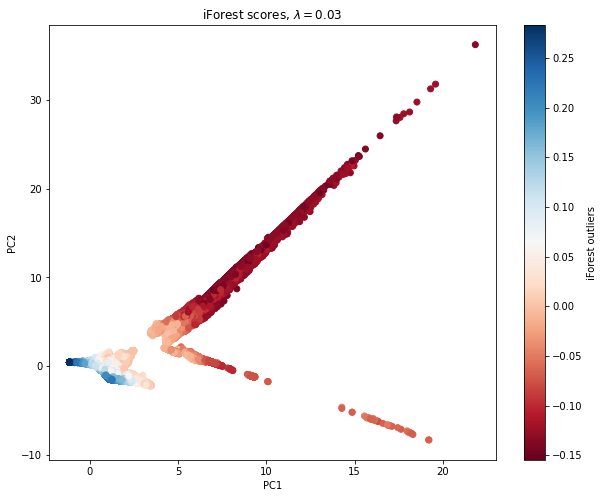

In [221]:
iso_forest2(dfelbow, 2, 20, 0.03)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean         0.227541          0.940179
std          0.096797          0.340682
min         -0.186586         -1.000000
25%          0.174675          1.000000
50%          0.296415          1.000000
75%          0.296415          1.000000
max          0.296415          1.000000
Prediciones: iForest_outliers
 1    840238
-1     25907
Name: count, dtype: int64


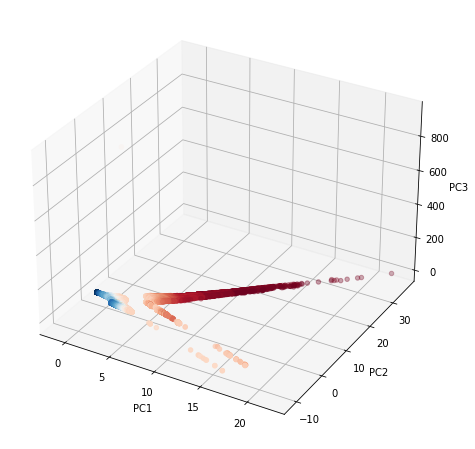

In [220]:
iso_forest2(dfelbow, 3, 20, 0.03)

Summary
       iForest_scores  iForest_outliers
count   866145.000000     866145.000000
mean        -0.017413          0.903166
std          0.078849          0.429291
min         -0.474687         -1.000000
25%          0.000000          1.000000
50%          0.000000          1.000000
75%          0.000000          1.000000
max          0.000000          1.000000
Prediciones: iForest_outliers
 1    824209
-1     41936
Name: count, dtype: int64


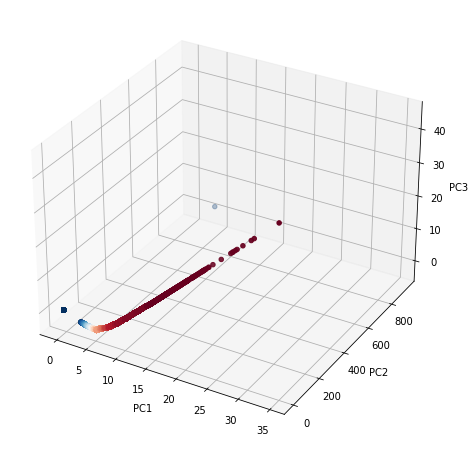

In [223]:
iso_forest2(df2210[['MTOINT', 'MTOREV', 'MCUOTA']], 3, 20, 0.05)

In [187]:
def iso_forest1(df, n_components, n_estimators, contamination):
    'Primero hacemos PCA, luego iForest'
    
    # Standardize features
    df_scaled = StandardScaler().fit_transform(df)
    # Define dimensions = 2
    pca = PCA(n_components=n_components)
    # Conduct the PCA
    principal_comp = pca.fit_transform(df_scaled)
    # Convert to dataframe
    pca_df = pd.DataFrame(data = principal_comp, columns = ['PC1', 'PC2'])

    # iForest
    # Hay que hacer cross validation de CONTAMINATION
    iForest = IsolationForest(n_estimators=n_estimators, verbose=0, contamination=contamination)
    iForest.fit(pca_df.values)
    predictions = iForest.predict(pca_df.values)

    # Extract scores
    pca_df["iForest_scores"] = iForest.decision_function(pca_df.values)
    # Extract predictions
    pca_df["iForest_outliers"] = predictions
    # Describe the dataframe
    print('Summary')
    print(pca_df.describe())

    # fig, ax = plt.subplots(1,1, figsize=(10,6))
    # plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.iForest_outliers, cmap='RdBu', alpha=0.8)
    # plt.colorbar(label='iForest outliers')
    # plt.show()
    if n_components == 2:
        fig, ax = plt.subplots(1,1, figsize=(10,6))
        plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.iForest_scores, cmap='RdBu')
        plt.title(f'iForest scores, $\lambda = {contamination}$')
        plt.colorbar(label='iForest outliers')
        plt.show()
    elif n_componenets == 3:
        pass
    else:
        print('No es posible visualizar resultados para mas componentes')

Summary
                PC1           PC2  iForest_scores  iForest_outliers
count  8.661450e+05  8.661450e+05   866145.000000     866145.000000
mean  -5.565260e-17  9.647325e-17        0.156139          0.900474
std    2.074825e+00  1.719130e+00        0.076920          0.434910
min   -1.323635e+01 -6.638039e+01       -0.219334         -1.000000
25%   -1.830812e+00 -1.320290e+00        0.121957          1.000000
50%   -1.051889e+00  1.615453e-01        0.179836          1.000000
75%    2.013272e+00  3.924467e-01        0.217159          1.000000
max    9.767224e+01  7.235611e+01        0.235409          1.000000


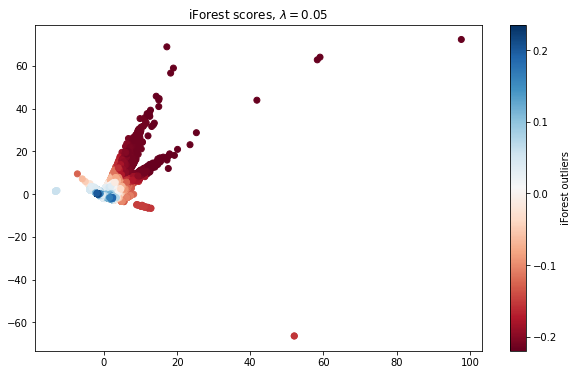

In [141]:
iso_forest1(df_num, 20, 0.05)

Summary
                PC1           PC2  iForest_scores  iForest_outliers
count  8.661450e+05  8.661450e+05   866145.000000     866145.000000
mean  -2.310108e-17 -4.200196e-17        0.111451          0.799999
std    2.074825e+00  1.719130e+00        0.078485          0.600002
min   -1.323699e+01 -6.639025e+01       -0.244608         -1.000000
25%   -1.830819e+00 -1.320340e+00        0.077734          1.000000
50%   -1.051861e+00  1.615329e-01        0.135484          1.000000
75%    2.013264e+00  3.925049e-01        0.169348          1.000000
max    9.768012e+01  7.232630e+01        0.193740          1.000000


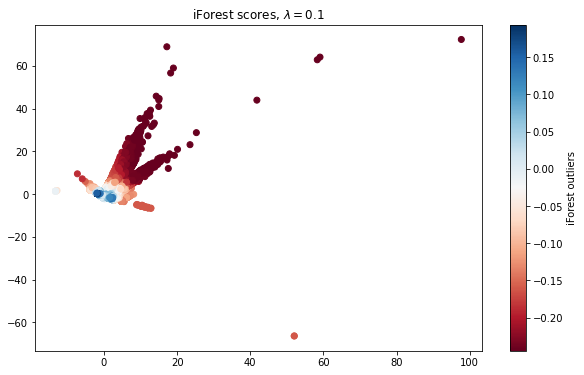

In [145]:
iso_forest1(df_num, 20, 0.1)

Summary
                PC1           PC2  iForest_scores  iForest_outliers
count  8.661450e+05  8.661450e+05   866145.000000     866145.000000
mean  -7.927870e-17  4.416769e-17        0.067967          0.600018
std    2.074825e+00  1.719130e+00        0.080070          0.799987
min   -1.323636e+01 -6.639188e+01       -0.300219         -1.000000
25%   -1.830814e+00 -1.320284e+00        0.021330          1.000000
50%   -1.051898e+00  1.615216e-01        0.082940          1.000000
75%    2.013266e+00  3.924987e-01        0.137266          1.000000
max    9.767715e+01  7.234016e+01        0.157770          1.000000


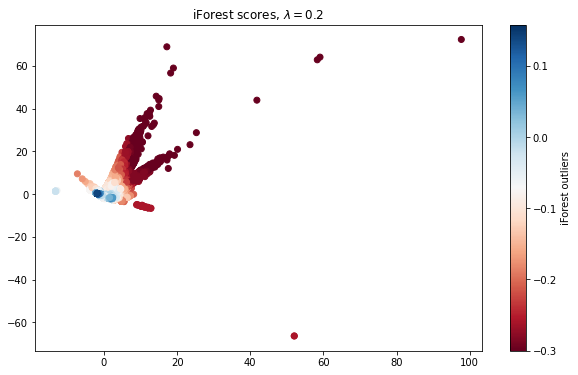

In [146]:
iso_forest1(df_num, 20, 0.2)

## Categoricas
Para variables categoricas, hacemos OneHotEncoding

In [32]:
DICC_CODFAM = list(pd.read_excel(PATH_DICC, sheet_name='CODFAM')['CODIGO'])[1:]
DICC_CODTLP = list(pd.read_excel(PATH_DICC, sheet_name='CODTLP')['CODIGO'])
#DICC_PROD = list(pd.read_excel(PATH_DICC, sheet_name='CODPRO')['CODIGO'])[1:]

codfam = pd.get_dummies(df2210.CODFAM, prefix='codfam')
codfam.head()

codpro = pd.get_dummies(df2210.CODPRO, prefix='codpro')
codpro.head()

,codpro_BC01,codpro_BC03,codpro_BC06,codpro_CA
17,False,False,False,True
18,False,False,False,True
19,False,False,False,True
20,False,False,False,True
21,False,False,False,True


In [35]:
df = pd.concat([codfam, codpro], axis=1)
df.head()

,codfam_BCND,codfam_CCTE,codpro_BC01,codpro_BC03,codpro_BC06,codpro_CA
17,False,True,False,False,False,True
18,False,True,False,False,False,True
19,False,True,False,False,False,True
20,False,True,False,False,False,True
21,False,True,False,False,False,True


In [36]:
iForest = IsolationForest(n_estimators=20, verbose=0)
iForest.fit(df)

IsolationForest(n_estimators=20)

In [37]:
pred_scores = -1*iForest.score_samples(df)

In [39]:
pred_scores.shape

(866145,)

In [42]:
np.argmax(pred_scores)

55

In [44]:
df2210.iloc[55]

RUT       1065909
CODFAM       BCND
CODPRO       BC03
CODTLP          T
ESTADO          6
MTOINT        0.0
MTOREV        0.0
SPROM         0.0
Name: 304, dtype: object

In [45]:
np.min(pred_scores)

0.48768172012541217

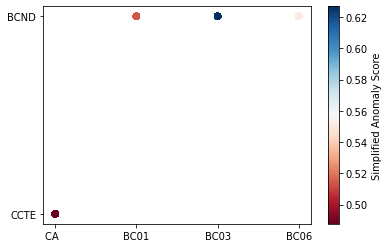

In [40]:
plt.scatter(df2210.CODPRO, df2210.CODFAM, c=pred_scores, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score')
plt.show()

 Isolation Forest feature to split at each node is selected at random. So it is not possible to have a notion of feature importance similar to RF

In [ ]:
# Opciones para reduccion de dimensionalidad
# t-SNE: no, pues no preserva distancias, no es bueno para outliers
# (isolation information could easily be removed)